<a href="https://colab.research.google.com/github/bartianbosch/Melk/blob/Jinli/Big_Data_Milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Big Data Groupwork Milk


In [1]:
# To download and update the necessary requirements, run this cell
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://archive.ubuntu.com/ubu

In [2]:
# To initialize Apache Spark, run this cell
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
sp = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Loading the data into a DF


In [3]:
!ls 'gdrive/MyDrive/'

'App ontwikkeling.gdoc'
 Big_Data_Groupwork_Project
 Bijbaan
'Bus 356 Connexion.gdoc'
'Citygames Delft:.gdoc'
'Colab Notebooks'
'Conneccie 2018-2019'
 CV
'DIPP meetings notebook.gdoc'
'edX courses, Udemy and more online courses.gdoc'
'(EUR) Erasmus Universiteit'
'Experiment 1 FP&D.gsheet'
'Experiment 1 FP&D.xlsx'
'Food Hazards Case Study Beer-Can Chicken.gdoc'
 GOT.gdoc
 Group39_Assignment2.gdoc
 Group39_Assignment4.gdoc
 IMG_5467.JPG
 IMG_5468.JPG
 IMG_5469.JPG
 IMG_5470.JPG
 IMG_5471.JPG
 INF33806
'Nooit meer vergeten'
'Online Examination Test 10 april 2020.gdoc'
'Quality Systems Operations Definitions sheet.gdoc'
 Roblox
'safari leeslijst.gdoc'
 Thee.gdoc
'Thymos evaluation survey 6 april 2020.gdoc'
 Vossius
'(VU) Vrije Universiteit'
 Wageningen
' Wild, Janniek de; Witsenboer, Jin-Li Food P&D practical 1, 2, 3 .gdoc'
'WSR ARGO ALV pagina.gdoc'


In [21]:
# Read the data from the csv file


#milk_rdd = spark.read.csv('gdrive/MyDrive/Big_Data_Groupwork/ff_dairy_v1.csv', header=True, inferSchema = True)
milk_rdd = spark.read.csv('/content/gdrive/MyDrive/Big_Data_Groupwork_Project/Big_Data_Groupwork/ff_dairy_v1.csv', header=True, inferSchema = True)

# work from dataframes is sufficient

In [22]:
milk_rdd.show(5)

+----------+-------+----+---------+---------+----------------+------------+----------+----+------------------------------------------+-----------------------------------------------+---------------------------+---------------------------+-----------------+-----------------------+-----------+----+-----------------+---------------+----+--------+------------+--------------+--------+---------------------+---------+---------------------+-------------------------+-------+-----------------------+---------------+-------------------------------------+--------------------------------------+-----------------+-------------------------+-------------------+-----------------------+-------+-------------------------+--------------------------+--------------+------------------+------------------+----------------------+------------------+--------+-------------------+-------------+---------------------+-----------------+--------------+----------+---------+----------+----------+---------+----------+-------

Qusetion 1: 

Which combination of nutrients is the best predictor for the fat yield (milk yield * fat %) ?

In [82]:
# select the yield column and fat% column

subDF_null = milk_rdd.select('Milk yield (kg)', 'Fat%')
subDF_null.show(5)

subDF = subDF_null.dropna()
yield_col = subDF.select('Milk yield (kg)')
fat_pc_col = subDF.select('Fat%')

subDF.show(5)

fat_yield = list(map(lambda x, y : x*y, yield_col, fat_pc_col))

# or 

milk_yield = data.loc[:, "Milk yield (kg)"]
fat = data.loc[:, "Fat%"]
total_fat = milk_yield * fat


+---------------+----+
|Milk yield (kg)|Fat%|
+---------------+----+
|          40.47|3.55|
|          38.29|null|
|          39.28|null|
|          38.16|null|
|          44.06|null|
+---------------+----+
only showing top 5 rows

+---------------+----+
|Milk yield (kg)|Fat%|
+---------------+----+
|          40.47|3.55|
|          40.12|3.49|
|          42.09|3.33|
|          36.26|3.45|
|          31.12|3.89|
+---------------+----+
only showing top 5 rows

[Column<b'(Milk yield (kg) * Fat%)'>]


In [72]:
# seletc the nutrient columns in g/day

# crude fiber, sugar, crude protein, crude fat, starch, Ca, P, Na, Cl, K, Mg, WDS, SPK, TPK, SPE, TPE, +I, Wi, GP 
# intestines: nXP, RNB, MELK, NEL, WDE, EKB

data_pandas = milk_rdd.toPandas()

cr_fiber_col = data_pandas.loc[:,'Crude fiber (g/day)']
sugar_col = data_pandas.loc[:,'Sugar (g/day)']
cr_protein_col = data_pandas.loc[:,'Crude protein (g/day)']
cr_fat_col = data_pandas.loc[:,'Crude fat (g/day)']
starch_col = data_pandas.loc[:,'Starch (g/day)']

ca_col = data_pandas.loc[:,'Ca (g/day)']
p_col = data_pandas.loc[:,'P (g/day)']
na_col = data_pandas.loc[:,'Na (g/day)']
cl_col = data_pandas.loc[:,'Cl (g/day)']
k_col = data_pandas.loc[:,'K (g/day)']
mg_col = data_pandas.loc[:,'Mg (g/day)']



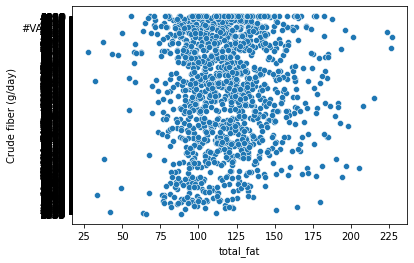

In [92]:
# create linear regression models 
import seaborn as sns 

#sns.scatterplot(x = total_fat, y = crude_fiber)

# or 

milk_rdd2 = milk_rdd.withColumn('total_fat', milk_rdd['Milk yield (kg)'] * milk_rdd['Fat%'])

sns.scatterplot(x='total_fat', y='Crude fiber (g/day)', data=milk_rdd2.toPandas())
